# Introduction to CPTAC and Proteomics

This document will take you through the basics of CPTAC and analyzing proteomic data in python. Let's get started!

## Setting up your working directory

Set your working directory to your analysis_data folder.

In [13]:
import os

os.chdir('/home1/awbai/analysis_data')

### Start exploring CPTAC with `cptac`
Similar to TCGAbiolinks, we need to load the package and download the data before using.
1. Import the package (`cptac`).
2. Look at the data sets available to us with the list_datasets() function. As a reminder, remember the package_name.method() syntax!
3. Download the one of interest (BRCA in our case).
4. Load it into our python environment.

In [1]:
# 1. Import cptac
import cptac 

# 2. Examine the data sets available with list_datasets()
cptac.list_datasets()

cptac warning: Your version of cptac (1.1.2) is out-of-date. Latest is 1.5.5. Please run 'pip install --upgrade cptac' to update it. (/spack/conda/envs/ood-jupyterlab-v4/lib/python3.11/threading.py, line 975)


,Description,Data reuse status,Publication link
Dataset name,,,
Brca,breast cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33212010/
Ccrcc,clear cell renal cell carcinoma (kidney),no restrictions,https://pubmed.ncbi.nlm.nih.gov/31675502/
Colon,colorectal cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/31031003/
Endometrial,endometrial carcinoma (uterine),no restrictions,https://pubmed.ncbi.nlm.nih.gov/32059776/
Gbm,glioblastoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33577785/
Hnscc,head and neck squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33417831/
Lscc,lung squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/34358469/
Luad,lung adenocarcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/32649874/
Ovarian,high grade serous ovarian cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/27372738/


In [2]:
# 3. Download the breast cancer data se5rt -- fill in dataset!
cptac.download(dataset="Brca")

# 4. Load the breast cancer data set
brca = cptac.Brca()

Now, we have our brca object containing a bunch of data. We can use the list_data() function the data available for the breast cancer dataset.
<br></br>
In addition to the proteomics data, we can also accesss the accompanying transcriptomics, CNV, etc. using this object. We will focus on the omics which we have already seen for this course; however, other data present in this dataset are also pretty interesting. Finally, many proteins can't be identified very well, so they won't appear as a column (for example, APC isn't in the proteomics data set).
<br></br>
**Exercise 1.1** Call the list_data() function from the brca object to examine the different data contained in the brca object. Much like calling functions from a package, we can use the brca.function() syntax.

* How many patients do you think there are in this dataset? (Make an educated guess about this from the dimensions - we'll confirm your answer later on) 

In [16]:
# Run the list_data() function
brca.list_data()

Below are the dataframes contained in this dataset and their dimensions:

acetylproteomics
	122 rows
	9868 columns
clinical
	122 rows
	18 columns
CNV
	122 rows
	23692 columns
derived_molecular
	122 rows
	36 columns
phosphoproteomics
	122 rows
	38775 columns
proteomics
	122 rows
	10107 columns
somatic_mutation
	24106 rows
	3 columns
transcriptomics
	122 rows
	23121 columns


**Exercise 1.2** Use the get_proteomics() function to store the proteomics data into a new data frame.

In [4]:
protein_data = brca.get_proteomics() # get the proteomics data
protein_data # view the data


# Uncomment and run this command after you get the data, you don't really need to know what it does but it collapses
# the column names and gets rid of the database_IDs which will make our lives much easier!

protein_data.columns = protein_data.columns.get_level_values(0) 


## (2) Exploring the Data

As mentioned earlier, `cptac` data is in the form of `pandas` dataframes. Let's load that and `numpy`. 

**Exercise 2.1** Import numpy and pandas with their usual shortened names (pd and np).

In [3]:
# import packages here

import numpy as np
import pandas as pd

Remember that we can access the rows/column names of a data frame in two ways:
1. We can get the row and column names together in a list with the `axes` attribute.
2. We can get the row or column names individually in the `index` (row) or `columns` (column) attribute.
<br></br>
**Exercise 2.2** Print the axes, index, and columns of the protein_data object. Then, determine its dimensions using the shape attribute. Finally, answer the following questions:

* How many rows and columns are there in the data frame? Columns represent a specific protein 
* What do the rows and columns represent? Rows represent each patient by their ID
* How many patients are there? 122
* What about proteins? 10107

In [19]:
## Explore the data frame here and answer questions
#protein_data.axes

#protein_data.index

#protein_data

protein_data.columns

Index(['A1BG', 'A2M', 'A2ML1', 'AAAS', 'AACS', 'AADAT', 'AAED1', 'AAGAB',
       'AAK1', 'AAMDC',
       ...
       'ZSCAN31', 'ZSWIM8', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDC', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='Name', length=10107)

Remember we can access data by name using `.loc[]` and `.iloc[]`. Since this dataset is really large, we won't really use `.iloc[]` which accesses by index. To get the protein expression information for a specific patient, therefore, we would run something like this: 

In [20]:
protein_data.loc["patient ID","protein name"] # this is the general case, you have to fill in actual IDs/protein names

KeyError: 'patient ID'

**Exercise 2.3** Remember that the numerical data in CPTAC is the relative fold change, not an absolute value/count. Given this, what kind of number would represent lower relative expression? What kind of number would represent higher relative expression? (Hint: reference level is 0) 

In [ ]:
## Answer question in comment form here
#A higher number would represent lower relative expression. Relative fold change means that there is a 
#ratio between two quantities. A lower relative expression might be the ratio 1:10, which would be a fold
#change of 10. A higher relative expression such as 50:50 would be represented by the smaller number 1.

**Exericse 2.4**

Print the relative fold change of patient `X01BR008` in the `TP53` protein. Then, interpret this value -- does this patient have higher or lower protein levels than the reference? (Hint: use .loc[] and remember that a `:` can be used in either the row or column slot to access every row or every column.)


In [ ]:
## write code here
print(protein_data.loc["X01BR008", "TP53"])

### Using Boolean indexing

In R, we used the `ifelse()` function very heavily to assign categories, such as classifying patients as "old" or "young". In Python, we have the `where(COND, TRUE_VAL, FALSE_VAL)` function from numpy, which works extremely similarly to ifelse(). That is:

   1. The first parameter is the condition (a boolean vector; i.e. Trues and Falses).
   2. The second parameter is the value to fill the True conditions.
   3. The third parameter is the value to fil lthe False conditions.
    
The following example (split into the four code blocks below) shows how to apply the `where()` function, in the context of telling if a number is odd or even.

In [ ]:
# first let's create our example array

number_example_array = pd.DataFrame({"nums": [0, 1, 2, 3, 4, 5]})
number_example_array

In [ ]:
# now, let's make a boolean vector where odds will be True, evens will be False
boolean_vector = (number_example_array % 2 == 1)
boolean_vector

In [ ]:
# then add this vector as a column in our array (we could do this and the above in one step)
number_example_array["boolean_vector"] = boolean_vector
number_example_array

In [ ]:
# lastly, let's add a third column called "parity" that says based off of "boolean_vector" if our value is odd/even
number_example_array["parity"] = np.where(boolean_vector, "Odd", "Even")
number_example_array

**Exercise 2.5** Access the following:

1. Use boolean indexing to access the patient IDs with high (≥1) `TP53` expression. Save this in a pandas DataFrame called `high_TP53`. HINTS:
    * Think about if protein expression information will be contained in a row or a column!
    * Create a boolean mask with the row/column that contains the expression information of `TP53`.
    * Apply the mask to the row/column names that contains the patient IDs.
2. How many patients are there in `high_TP53`? Which axis (columns or rows) represents proteins? There are 11 patients. The columns represent proteins. 
3. Add a column to `high_TP53` that has the values "High"/"Average"/"Low" based on ARF1 expression. 
4. How many patients have high expression of both `TP53` and average expression of `ARF1`?

In [ ]:
# Creating high_TP53

boolean_mask = (protein_data.loc[:, "TP53"] >= 1)

high_TP53 = protein_data.loc[boolean_mask, :]

high_TP53

#Adding column based on ARF1 expression





## (3) Additional data in CPTAC

You can also access other data using the `cptac` python package for the same patients, using the corresponding get function.

**Exercise 3.1** Access the RNA (transcriptomics) and clinical data from the brca object. The function name is very similar in syntax to the get_proteomics() function from before!

In [5]:
rna_data = brca.get_transcriptomics()
clinical_data = brca.get_clinical()

clinical_data

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,TMT.Plex,TMT.Channel,Stage,Ischemia.Time.in.Minutes,PAM50,NMF.Cluster,NMF.Cluster.Membership.Score,Age.in.Month,Gender,Ethnicity,ER.Updated.Clinical.Status,PR.Clinical.Status,ERBB2.Updated.Clinical.Status,TNBC.Updated.Clinical.Status,ERBB2.Proteogenomic.Status,TOP2A.Proteogenomic.Status
Patient_ID,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,13,127C,Stage IIA,NaN,Basal,Basal-I,1.000,NaN,NaN,black.or.african.american,negative,negative,NaN,positive,negative,negative
CPT001846,CPT001846,Tumor,12,128C,Stage III,NaN,Basal,Basal-I,0.672,NaN,NaN,white,negative,negative,NaN,positive,negative,negative
X01BR001,X01BR001,Tumor,2,129N,Stage IIB,0.0,Basal,Basal-I,0.782,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X01BR008,X01BR008,Tumor,16,127C,NaN,NaN,Basal,Basal-I,0.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative,negative
X01BR009,X01BR009,Tumor,16,127N,NaN,NaN,Basal,Basal-I,0.825,NaN,NaN,NaN,negative,negative,NaN,positive,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,X21BR001,Tumor,16,128N,NaN,NaN,LumB,LumB-I,0.536,NaN,NaN,white,negative,negative,NaN,negative,positive,negative
X21BR002,X21BR002,Tumor,16,128C,NaN,NaN,LumA,LumB-I,0.443,NaN,NaN,white,positive,positive,NaN,negative,negative,negative
X21BR010,X21BR010|X21BR010.REP1,Tumor,3|17,129C|128C,Stage IIA,18.0,LumA,LumA-I,0.559,852.0,female,white,positive,positive,negative,negative,negative,negative


**Exercise 3.2** Examine these dataframes. In particular:

* What do the values in the rna_data data frame represent? The rows are patient IDs and the columns are specific genes. 
* Compare the dimensions of the high_TP53, rna_data, and clinical_data. Are they equal? They are equal!

In [ ]:
# explore the data frames using shape, axes, and other functions we've gone over.

rna_data.axes
rna_data.index
rna_data.columns

clinical_data.index
clinical_data.columns
clinical_data.axes


The dimensions for each dataframe might not be equal depending on if you masked some patients. That's where the `intersect1d()` function from numpy becomes really useful, especially if we want to analyze transcriptomics, proteomics, and clinical data together. This lets us see which patient barcodes are shared between the data frames.


Let's take a look at all of the patients who are older than 50 years old at the time of diagnosis. 
<br></br>
**Exercise 3.3**
1.  Use the clinical data DataFrame to create a boolean mask for the condition of patients being older than 50.
2.  Mask the clinical data and assign it to a DataFrame called 'masked_clinical'.

In [ ]:
# write code here





Now that we have masked our data, if we tried to do an analysis using the different data frames, we would get a lot of errors since we are now missing some patients in our masked_clinical data frame. If we want to get the patients who are present in the masked data as well as the rna_data and protein_data, we can use intersect1d().

**Exercise 3.4**
1. Use `intersect1d()` from np to create a list that contains the patient IDs for each pair of data frames as mentioned below. (Hint: this function takes two 1d arrays, which would be patient IDs from two different dataframes. How do we get this from each dataframe? Are patient IDs rows or columns?) 
2. Use a for loop to print the lengths of these three data frames, and compare them to the number of rows. The for loop skeleton is below. What do you notice about the three lengths? Do the numbers correspond to anything in particular?
3. Finally, identify which intersection contains the patient IDs where there is data for all three levels of data (proteomics, transcriptomics, and clinical). How can we tell?

In [ ]:
# 1.
name_intersects = [
    , # 0. fill in intersecting for protein/rna here using intersect1d()
    , # 1. fill in intersecting for protein/masked clinical here
    , # 2. fill in the intersecting for rna/masked clinical here
]

# 2. Print the lengths here
# write a for loop here
    print(f"The length of ____ is _____")  # fill in here
    
# 3. Which comparison(s) contain the patient names that have all three levels?

## (4) Examining the Clinical Data

Let's explore the clinical data in more detail.

First, use head() to glance as to what data is available.

In [ ]:
# write code here

**Exercise 4.1** You might notice that the Age column values don't look like years -- they're in months. Create a new column called "Age" with the "Age.in.Month" values / 12. Then, use head() again to make sure the ages were converted.

In [ ]:
# convert ages here!

There are actually control (non-cancer) tissue samples in some datasets. Let's determine whether we need to account for this in our dataset this using the unique() function from numpy.

__Exercise 4.2__ Call the unique() function on the Sample_Tumor_Normal column. The function will return the unique values in the column in a sorted order -- this is super useful for examining categorical variables, like tumor stage and tumor status, for example.

In [ ]:
# Get the levels of the Sample_Tumor_Normal column with unique()

__Exercise 4.3__ Let's examine how tumor stage varies as a function of age:

   1. Import the plotting libraries matplotlib.pyplot and seaborn (use the standard abbreviations presented last time, seaborn is sns).
   2. Create an age_category column in clinical_data. Define "Young" as under the median age, and "Old" as the median age and older. (Hint: use the where() function from numpy, the equivalent to ifelse()).
   3. The "Stage" information for soome of these patients is NaN (the pandas version of NA). Use the isna() function from pandas and boolean indexing (i.e. where() from numpy again) to remove any patients with NaN values in "Stage".
   4. Using nested for loop and boolean indexing, count the number of old and young patients that have Stage I, Stage II, Stage III, and Stage IV cancer.
   5. Use the skeleton code to draw the barplot. Do your numbers make sense?

In [ ]:
# 1. Import libraries here


# 2. Create the age_category column in clinical_data


# 3. Filter our NaN



## this will programatically get all the stages in order
stage_categories = np.unique(clinical_data.loc[:, 'Stage'])
assert(np.all(stage_categories == ['Stage IA', 'Stage IIA', 'Stage IIB',
                                    'Stage III', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC']))

# 4. Loop through all the stage categories and count

for age_cat in ["Old", "Young"]: # first get the old data, then the young data
    print(age_cat)
    # fill this in with the cancer category:
    for ...:
        # 1. create a subset of the data frame with the old/young patients
        # 2. count the number of patients with the stage of cancer and print


        
# 5. Create a barplot to compare your results
sns.countplot(
    x = "age_category",
    hue = "Stage",
    hue_order = stage_categories,
    data = INSERT HERE
)

plt.show()

## (5) Plotting Proteomic Data

Let's explore how the proteomic expression of a gene differs between young and old patients.

**Exercise 5.1** Plot the expression data of a chosen protein stratified between patients older and younger than the median age.

In [ ]:
young_mask = FILL IN HERE # the age column is 'Age.in.Month', which (as stated) is in months
old_mask = FILL IN HERE

young = (protein_data.loc[FILL IN HERE]).dropna()
old = (protein_data.loc[FILL IN HERE]).dropna()

data = [old.values, young.values] # our boxplot function will require an array (or an array of arrays)
data

In [ ]:
fig, ax = plt.subplots()

plt.axhline(y = 0, color = 'blue', linestyle = '-')
plt.axhline(y = -1, color = 'blue', linestyle = ':')
plt.axhline(y = 1, color = 'blue', linestyle = ':')


bp = ax.boxplot(FILL IN HERE) # data goes here
plt.xticks([1, 2], ["FILL IN HERE", "FILL IN HERE"]) # use \n for new line if desired


plt.show()

**Exercise 5.2** Why do you think we added lines at -1, 0, and 1? What do these values represent in terms of log2FoldChange?

In [ ]:
# answer in a comment here

## (6) SciPy
Another question to ask is if the levels of RNA expression correlate with protein expression. While we would expect for there to be a 1:1 relationship between RNA and protein (according to the central dogma), as you will see, this is not what we oftentimes observe.

In [ ]:
from scipy import stats # we are using the stats package in particular

The first thing we need to do is to identify which patients and genes are shared between the transcriptomic and proteomic data sets.

Luckily for us, all 122 patients in the Brca dataset have clinical, transcriptomic, and proteomic data. If this were not the case (such as in the colon cancer database), we would use intersect1d() to fix this. We will still need to use intersect1d() to determine which genes are shared.

**Exercise 6.1** To make sure the data frames match:

1. Identify the names of the genes that are shared between the two datasets (hint: use intersect1d()). Is this data the row or column names?
2. Create the rna_shared and prot_shared data frames; ie dataframes with only genes that are shared between rna and protein data. (Hint: how can we access rows/columns by name?).

In [ ]:
# 1. Identify the genes (RNA, protein) shared between the two data sets 
shared_rna_prot = FILL IN HERE

# 2. Create the two data frames
rna_shared = FILL IN HERE
prot_shared = FILL IN HERE

Now, we can see how correlated the RNA and protein levels are. We'll use Spearman correlation from the stats library, which is spearmanr().

**Exercise 6.2** Choose a gene and get the Spearman correlation of the rna to protein of that gene.

In [ ]:
# we need the nan_policy="omit" to throw out NaN values
corr, pval = stats.spearmanr(rna_shared["FILL IN HERE"], prot_shared["FILL IN HERE"], nan_policy="omit")

print(f"The correlation of FILL IN HERE is {round(corr, 3)} (p = {round(pval, 10)}).")

**Exercise 6.3** What is your gene's Spearman correlation? What does that mean mathematically? What could this represent biologically? Look into the literature to see if it corroborates this idea.

In [ ]:
# answer in a comment here

## (7) Heatmaps
**Exercise 7.1** A problem arises if we want to compare many correlations. Heatmaps are useful for visualizing a large number of comparisons. To make a heatmap, we'll use the heatmap() function from seaborn. Let's do the following:

1. Set up our data frame to hold all comparisons. All you need to do is to access the first 20 gene names.
2. Calculate the correlations for the first 20 genes (just to save time). You'll need to use two for loops.
3. Call heatmap() -- this is filled in for you!
4. Interpret the data. There is a "light" diagonal along the heatmap from the top-left to bottom-right. Is this expected? Why or why not?

In [ ]:
import seaborn as sns

In [ ]:
ncomparisons = 20 # define this variable in case we want to change the number of correlations to test
                  # this makes it less likely you'll forget to change a number, e.g. in the data frame shape
gene_names = FILL IN HERE # get the first ncomparisons gene names


# Don't worry about this code
# It's good practice to declare your data frame beforehand (it's much faster than appending to a list)
# We fill everything in with 0 just as a placeholder
corr_df = pd.DataFrame(np.ndarray(shape=(ncomparisons, ncomparisons), dtype=np.float16),
                      index = gene_names,
                      columns = gene_names)

# 2. fill in the data frame!
for g1 in gene_names:
    for g2 in gene_names:
        # calculate the correlations between protein and RNA
        # then, use .loc[] to store the correlation in corr_df
        FILL IN HERE

# 3. create the heat map
plot = sns.heatmap(
    corr_df,
    cmap='mako',
)
plot.set_xlabel('Protein', fontsize=10)
plot.set_ylabel('RNA', fontsize=10)
plt.show()

# 4. interpret!

## (8) More with Seaborn
seaborn is a nice package which works well with matplotlib and makes prettier plots with more control over the figure.

Here's how you make a scatter plot with seaborn, for example:

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age.in.Month"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

plt.show()

**Exercise 8.1** Update the above plot to:

1. Have age in years instead of months.
2. Color patients based on gender (or another clinical variable of your choosing)
3. Have a side-by-side second plot with a different protein of your choosing

In [ ]:
# create plot here

## (9) Saving Plots
Remember, to save a plot, we can call plt.savefig() instead of the plt.show().

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = rna_data.loc[:, "top 5"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

# age_scatter.png is a relative path so check your working directory before running it
plt.savefig('age_scatter.png', bbox_inches='tight')

# Exercises
Only this section will be graded!
## 1. Drawing Connections
1. Choose a clinical variable and segment the cohort into two groups. 
2. Find out what the 5 most differentially expressed genes are (we aren't going to do this in a sophisticated way like DESeq, instead just take the mean expression of every single gene within a group and find the gene which has the greatest difference in mean between the two groups)
3. Create two scatter plots, side by side, each with one group. Within the scatter plots, plot (mean?) RNA expression versus protein expression for each of the genes (top 5) in a different color.
4. Add appropriate legend, title, and labels.

In [13]:
#Clinical variable: TNBC Status

#Create a dataframe with just patient barcodes and gender
tnbc_df = clinical_data[["TNBC.Updated.Clinical.Status"]].copy()

#Create a mask selecting only positive 
positive_mask = tnbc_df['TNBC.Updated.Clinical.Status'] == 'positive'

positive_mask

#Create a mask selecting only false 
negative_mask = tnbc_df['TNBC.Updated.Clinical.Status'] == 'negative'

negative_mask


#Finding means of positive cohort 
positive_protein_data = protein_data.loc[positive_mask, :]
positive_protein_data

negative_protein_data = protein_data.loc[negative_mask, :]
negative_protein_data


#Finding difference between means of each gene 
positive_gene_mean = np.mean(positive_protein_data, axis=0)
positive_gene_mean

negative_gene_mean = np.mean(negative_protein_data, axis=0)
negative_gene_mean

difference_gene_mean = (positive_gene_mean - negative_gene_mean)
difference_gene_mean

difference_gene_mean.sort_values()



Name
MAPT       -5.042797
MYOF       -4.656245
MLPH       -4.646687
GFRA1      -4.082233
ADIRF      -4.034960
              ...   
TUBB2B      4.454022
PSAT1       4.587663
SRSF12      4.976077
SOX10       5.728435
PPP1R14C    6.067608
Length: 10107, dtype: float64

In [ ]:
#Top 5 genes: PPP1R14C, SOX10, SRSF12, MAPT, MYOF

#Genes in Scatterplot: PPP1R14C, SOX10, SRSF12, PSAT1, TUBB2B 

#IMPORTANT: MAPT and MYOF are among the top 5 genes with greatest difference between positive and negative cohorts. 
#However, MAPT and MYOF appear twice in rna_data with different gene expressions in each, which did not allow my scatterplot to run.
#After attending office hours, I was instructed to replace MAPT and MLPH with the next highest difference genes that were not duplicated, which were PSAT1 and TUBB2B.


In [ ]:
#Checking dimensions of rna_data for specific gene
rna_data.loc[positive_mask, "MLPH"]

In [11]:
#Checking dimensions of protein_data for specific gene
#protein_data.loc[positive_mask, "MYOF"]
import matplotlib.pyplot as plt

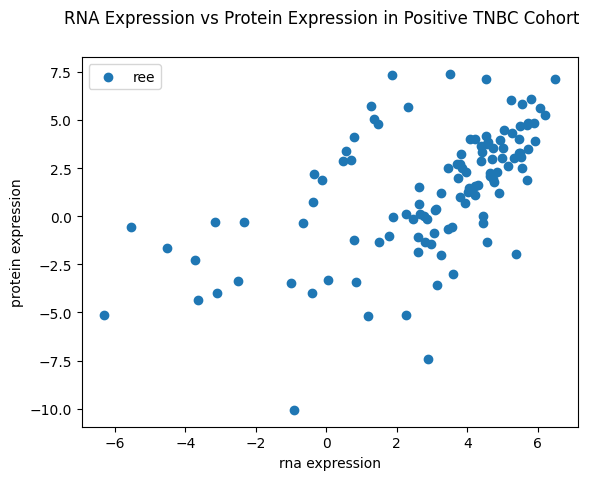

In [24]:
#Scatterplot for positive group

import matplotlib.pyplot as plt

#import seaborn as sns
#seaborn is not available on CARC

fig, ax = plt.subplots()

colors = {'SOX10':'red', 'PPP1R14C':'green', 'SRSF12':'blue', 'PSAT1':'yellow', 'TUBB2B':'purple'} #adds color

ax.scatter( # x-axis
    x = rna_data.loc[positive_mask, ['SOX10', 'PPP1R14C', 'SRSF12', 'PSAT1', 'TUBB2B']],
    y = protein_data.loc[positive_mask, ['SOX10', 'PPP1R14C', 'SRSF12', 'PSAT1', 'TUBB2B']],# y-axis
    # ax = ax  # necessary for when plotting more than 1 subplot
)

plt.xlabel('rna expression') # Adds labels
plt.ylabel('protein expression')
plt.legend()  #Adds legend


fig.suptitle('RNA Expression vs Protein Expression in Positive TNBC Cohort')  # adds title

plt.show()

SyntaxError: keyword argument repeated: x (3280680318.py, line 10)

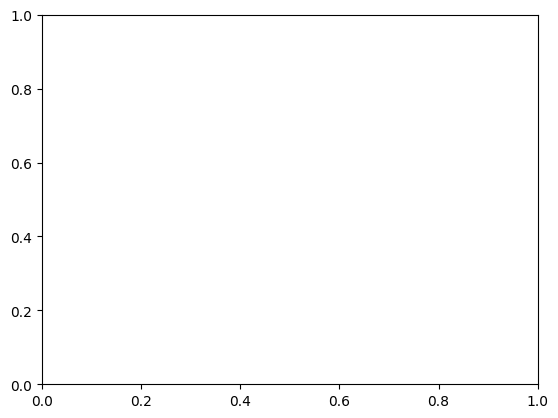

In [23]:
#Scatterplot for negative group


fig, ax = plt.subplots()

colors = {'SOX10':'red', 'PPP1R14C':'green', 'SRSF12':'blue', 'PSAT1':'yellow', 'TUBB2B':'purple'} #adds color

ax.scatter( # x-axis
    x = rna_data.loc[negative_mask, ['SOX10', 'PPP1R14C', 'SRSF12', 'PSAT1', 'TUBB2B']],
    y = protein_data.loc[negative_mask, ['SOX10', 'PPP1R14C', 'SRSF12', 'PSAT1', 'TUBB2B']],# y-axis
    # ax = ax  # necessary for when plotting more than 1 subplot
    x = 'rna expression',
    y = 'protein expression'
)
plt.xlabel('rna expression') #adds label
plt.ylabel('protein expression')
plt.legend() #adds legend

fig.suptitle('RNA Expression vs Protein Expression in Negative TNBC Cohort')  # adds title

plt.show()

## 2. Interpretation Skills
This section is short-answer based written responses. Please respond in 2-3 sentences to each question below for full credit.
1. What do the numbers within the protein and transcriptomics DataFrames represent? Why do we represent them this way?
2. Why are there fewer columns in the protein DataFrame than the transcriptomics one?
3. Explain how the central dogma may be broken in between DNA -> RNA -> Proteins and how this might affect our proteomics data.
4. Why is proteomics data relatively scarce compared to sequencing data?
5. Should we ever expect protein expression to be 0 in a tumor sample?
6. What are protein domains and how do they relate to the role of a protein?
7. Overexpression of the ERBB2 gene is found in up to 20% of breast cancer cases. ERBB2 encodes the receptor tyrosine-protein kinase erbB-2, frequently called HER2 in humans. Thus, cases in which ERBB2 is overexpressed are referred to as HER2+. Briefly skim the following paper and answer the following questions. https://www.sciencedirect.com/science/article/pii/S1044579X20300493
>Is ERBB2 an oncogene or a tumor suppressor gene? How do mutations within the gene affect the prognosis of the disease?
<br></br>
>What are some treatment strategies for HER2+ breast cancer?
<br></br>
>What is one recent development that has changed our understanding of HER2+ breast cancer?

In [ ]:
#1
#The number represent protein/gene expression of a specific patient compared to a pool of all samples. They are represented this way so each dataframe has the same number of rows, making it easier to compare patient information.

#2
#Multiple genes are coding for the same protein. Alternatively, reverse transcription may occur where instead of being translated into a protein, some RNA may be used to synthesize DNA. This can promote cancer cell proliferation.

#3
#The central dogma states that genetic information can only flow one direction. If this flow is broken during transcription from DNA to RNA, such malfunctions in RNA polymerase, fewer proteins and less columns would be found in our proteomics data. The same applies to if errors in translation from mRNA to amino acids were to occur in the ribosome.

#4
#Proteins of a tumor sample can significatly vary by amount. It may be difficult to detect low-abundance proteins without exclusing the high-abundance ones, and vice versa. Proteins are also much more complex than DNA/RNA. Where there are only four standard nucleotide bases, proteins have 20 amino acids and can adopt many different structures from folding.

#5
#No, this would be represented as a NaN value.

#6
#A protein domain is a structural or functional unit of a protein. Most proteins consist of several domains, which can work independently or in a collaborative manner with its neighnors, enabling protein multifunctionality and specialization.

#7
#ERBB2 is an oncogene, and overexpression leads to poorer prognosis compared to HER2- cases of breast carcinomas. HER2+ influences cancer cell proligeration, migration, invasion, and patient survival rates.
#Monoclonal antibody trastuzumab is a potential treatment, targeting the extracellular domain of HER2 to promote normal tyrosine kinase signaling. Trastuzumab-containing chemotherapy, neoadjuvant anthracycline-taxane-based chemotherapy, and other chemotherapies involving taxanes were also cited.
#Creation of the new category HER2-low is significant as prior studies always categorized overexpression as HER2+ or HER2-. More specific classifications allow more effective, individualized therapeautic approaches.


## 3. Challenge Exercise - Incorporating Genomics
This exercise is optional and is worth extra credit up to 5 points. The combined extra credit between challenge exercises will cap out at 5 points total.
<br></br>
We can get somatic mutation data for cptac patients the same way we get proteomics, transcriptomical, or clinical. Let's explore some aspects of it.
1. Save the BRCA somatic mutation data to `mutation_data`
2. Determine the top 10 most commonly mutated genes within the dataset.
3. Determine what percent of patients have a mutation in at least one of those genes.
4. Create a bar plot that shows percent percent of patients that have exactly 0-10 out of 10 of those mutations. Name axes and titles appropriately.

In [ ]:
# write code here

## 4. Challenge Exercise - Background Research
This exercise is optional and is worth extra credit up to 5 points. The combined extra credit between challenge exercises will cap out at 5 points total.
<br></br>
PAM50 is a breast cancer model based on clustering of breast cancer subtypes by expression of 50 selected genes. Our clinical data contains PAM50 subtypes for every patient.

You can read about the methodology more here:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2667820/

Using the CPTAC dataset, recreate one of the findings present in the paper. Create some form of figure to present your finding. In comments below, state your conclusion from the figure and whether it is supported by the paper above.

In [ ]:
# write code here